## Data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("beatafaron/fmcg-daily-sales-data-to-2022-2024")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fmcg-daily-sales-data-to-2022-2024


In [ ]:
import os
input_path = os.listdir("/kaggle/input/fmcg-daily-sales-data-to-2022-2024")
input_path

['weekly_df_final_for_modeling.csv',
 'FMCG_2022_2024.csv',
 'df_weekly_MI-006_enriched.csv',
 'batch_MI-006_2025-01-27.parquet',
 'batch_MI-006_2025-01-06.parquet',
 'batch_MI-006_2025-01-13.parquet',
 'batch_MI-006_2025-01-20.parquet']

In [ ]:
import pandas as pd
dataset_path = "/kaggle/input/fmcg-daily-sales-data-to-2022-2024"

file_path = os.path.join(dataset_path,'FMCG_2022_2024.csv')
data =pd.read_csv(file_path)
data.head()

#SKU(Stock Keepung unique) or unique indentifier
#promotion flag = 1 if promo active

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


## EDA

In [ ]:
#Bussines insigth nya : total sales per year? is it growing?
#total sales per year look per category, per region, brand
import matplotlib.pyplot as plt
import seaborn as sns


data['date'] = pd.to_datetime(data['date']) # ubah bentuk datetime

data['year'] = data['date'].dt.year

data['revenue'] = data['price_unit'] * data['units_sold']
rev_ctg = data.groupby(['year', 'category'])['revenue'].sum().reset_index()



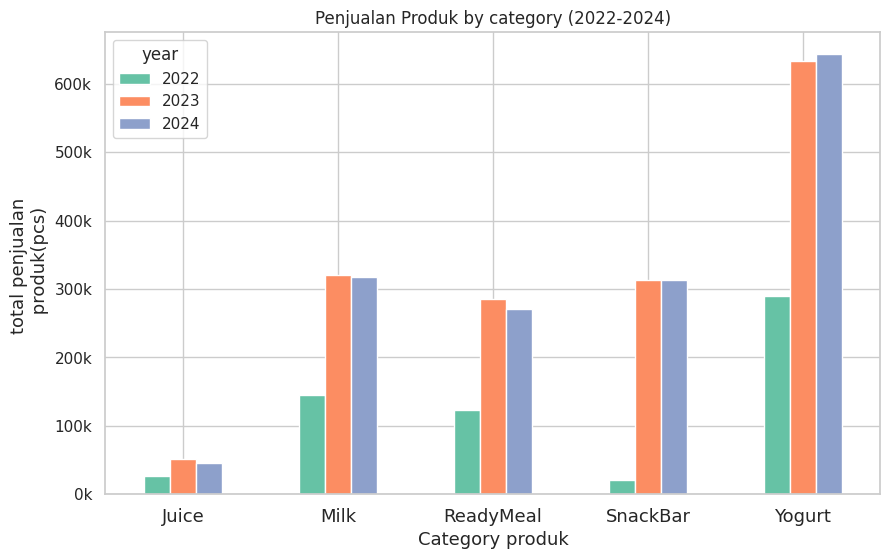

In [ ]:
import matplotlib.ticker as ticker

sl_cat= data.groupby(['year','category'])['units_sold'].sum().reset_index()

#insight plot sales per year by category
pivot_cat = sl_cat.pivot(index= 'category', columns= 'year', values='units_sold')
colors = plt.cm.Set2.colors

pivot_cat.plot(kind='bar', figsize=(10,6), color=colors)
plt.title ('Penjualan Produk by category (2022-2024)')
plt.xlabel('Category produk', fontsize = 13)
plt.ylabel('total penjualan \n produk(pcs)', fontsize= 13 )
plt.xticks(rotation=0, fontsize = 13)
plt.legend(title='year')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _:f'{int(x/1000)}k'))
plt.show()

In [ ]:
sl_seg= data.groupby(['year', 'segment'])['price_unit'].sum()

In [ ]:
brandsl= data.groupby('brand')['price_unit'].sum().reset_index()
ctgsl=data.groupby('category')['price_unit'].sum().reset_index()

top3ctg=ctgsl.sort_values(by='category', ascending=False).reset_index()
top3brand= brandsl.sort_values(by='price_unit',ascending=False).head(3)['brand'].tolist()


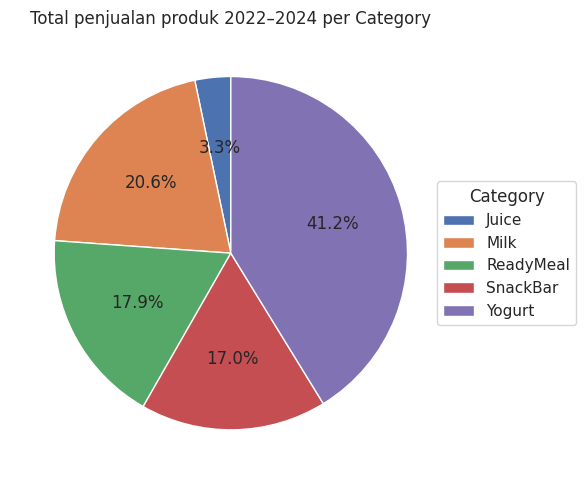

In [ ]:
ctgprd=data.groupby('category')['units_sold'].sum().reset_index()
# Create pie chart from DataFrame
plt.figure(figsize=(5,5))
patches, texts, autotexts = plt.pie(
    ctgprd['units_sold'],                # values
    autopct='%1.1f%%',                  # percentage display
    startangle=90
)

plt.title('Total penjualan produk 2022–2024 per Category')
plt.ylabel('')
plt.tight_layout()
plt.legend(patches, ctgprd['category'], title='Category', loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.show()

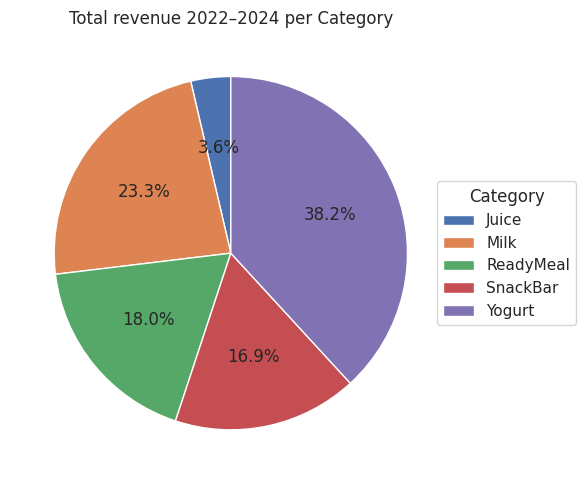

In [ ]:
# Create pie chart from DataFrame
plt.figure(figsize=(5,5))
patches, texts, autotexts = plt.pie(
    ctgsl['price_unit'],                # values
    autopct='%1.1f%%',                  # percentage display
    startangle=90
)

plt.title('Total revenue 2022–2024 per Category')
plt.ylabel('')
plt.tight_layout()
plt.legend(patches, ctgsl['category'], title='Category', loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.show()

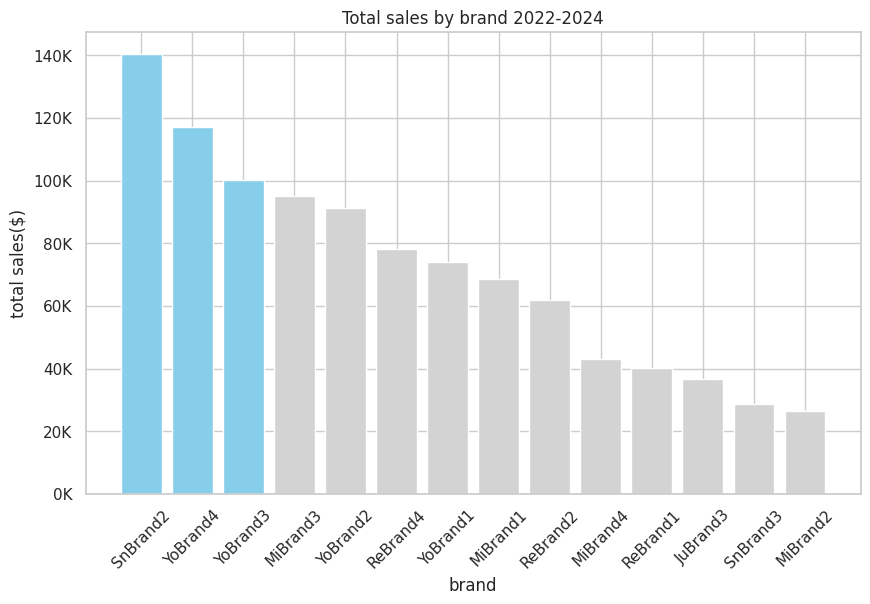

In [ ]:
brandsl['color'] = brandsl['brand'].apply(lambda x: 'skyblue' if x in top3brand else 'lightgrey')

brandsl = brandsl.sort_values(by='price_unit', ascending= False)

plt.figure(figsize=(10,6))
bars = plt.bar(
    x = brandsl['brand'],
    height =brandsl['price_unit'],
    color =brandsl['color']
)

plt.title('Total sales by brand 2022-2024')
plt.xlabel('brand')
plt.ylabel('total sales($)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _:f'{int(x/1000)}K'))
plt.show()

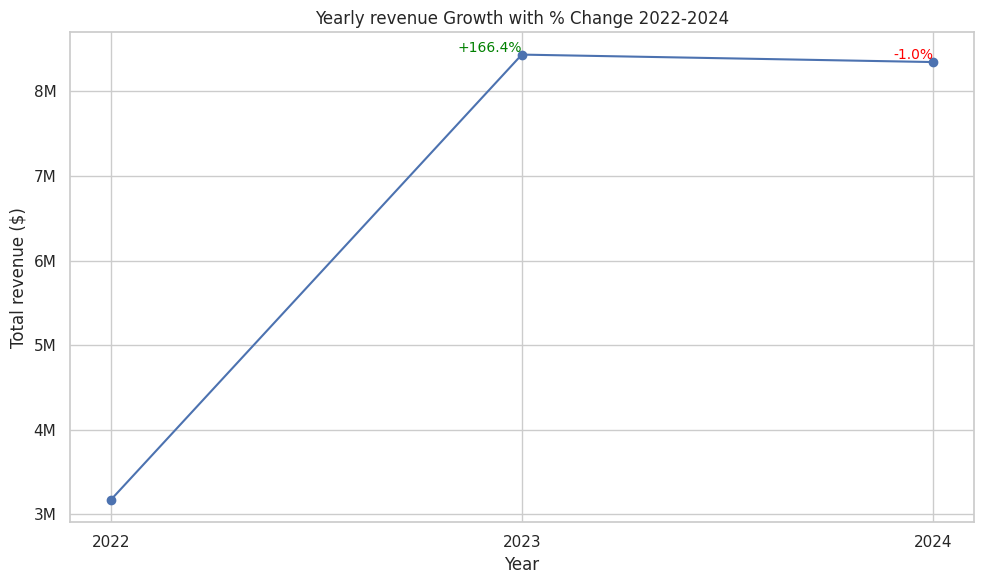

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def format_thousands(x, pos):
    return f'{int(x/1000)}k'

def format_millions(x, pos):
    return f'{int(x/1000000)}M'

rev_cat = data.groupby('year')['revenue'].sum().reset_index()

rev_cat['growth_pct'] = rev_cat['revenue'].pct_change()*100

plt.figure(figsize=(10,6))
plt.plot(rev_cat['year'], rev_cat['revenue'], marker='o')

for i in range (1, len(rev_cat)):
  x= rev_cat['year'][i]
  y= rev_cat['revenue'][i]
  growth_text = f"+{rev_cat['growth_pct'][i]:.1f}%" if rev_cat['growth_pct'][i] > 0 else f"{rev_cat['growth_pct'][i]:.1f}%"
  plt.text(x, y, growth_text, fontsize=10, ha='right', va='bottom', color='green' if rev_cat['growth_pct'][i] > 0 else 'red')

# Axis formatting
plt.xlabel('Year')
plt.ylabel('Total revenue ($)')
plt.title('Yearly revenue Growth with % Change 2022-2024')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))
plt.xticks(rev_cat['year'])
plt.tight_layout()
plt.show()



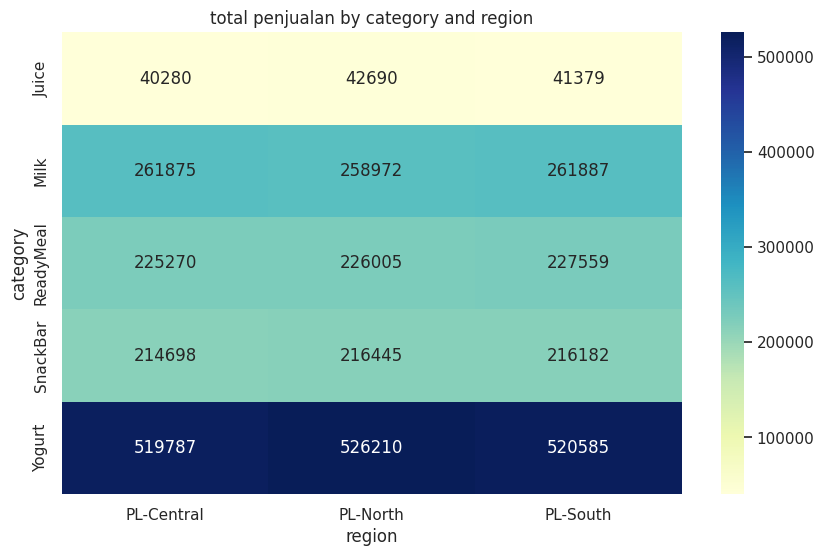

In [ ]:
reg = data.groupby(['region','category'])['units_sold'].sum().reset_index()

regn= reg.sort_values(by= 'units_sold', ascending=False)


#plot
heatmap= reg.pivot(index='category', columns='region', values='units_sold')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap, annot=True, fmt= '.0f', cmap='YlGnBu')
plt.title('total penjualan by category and region')
plt.xlabel('region')
plt.ylabel('category')
plt.show()

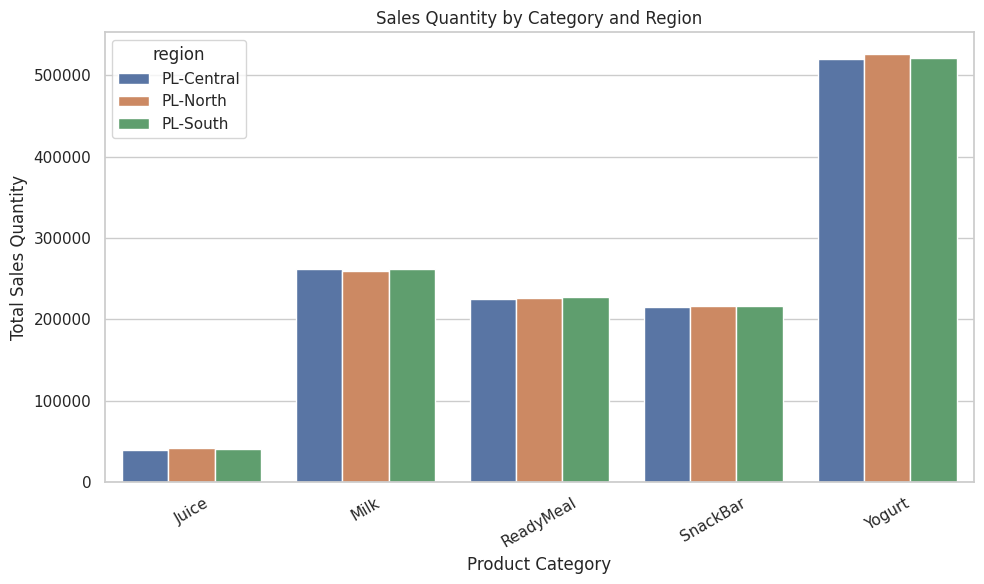

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=reg, x='category', y='units_sold', hue='region')
plt.title("Sales Quantity by Category and Region")
plt.ylabel("Total Sales Quantity")
plt.xlabel("Product Category")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
#seasonal
data['month']= data['date'].dt.month
monthly_sales= data.groupby(['year','month','category'])['price_unit'].sum().reset_index()

In [ ]:
monthly_salespdt= data.groupby(['year','month','category'])['units_sold'].sum().reset_index()

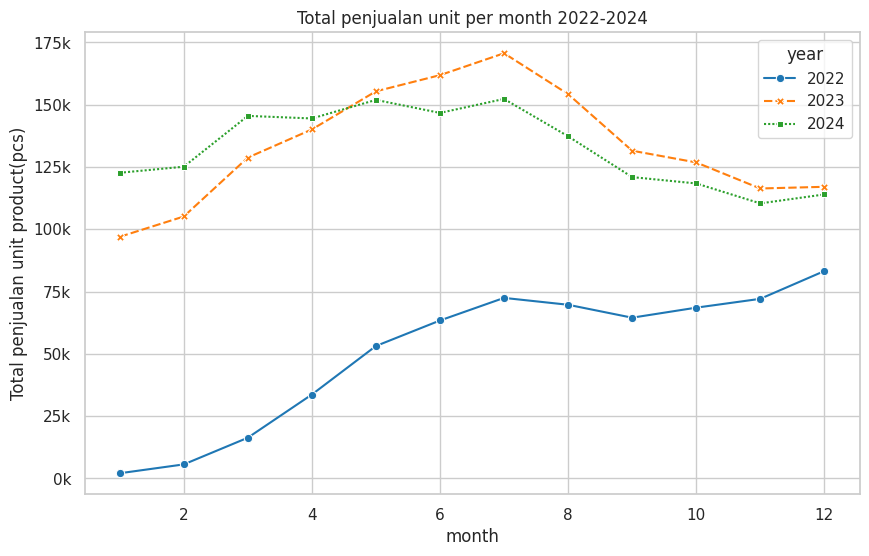

In [ ]:
montsll_product=data.groupby(['year','month'])['units_sold'].sum().reset_index()
sns.set(style= 'whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=montsll_product, x='month', y='units_sold', hue='year',style= 'year', markers= True, errorbar=None, palette='tab10')
plt.title( 'Total penjualan unit per month 2022-2024')
plt.xlabel('month')
plt.ylabel('Total penjualan unit product(pcs)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.legend(title='year')
plt.show()

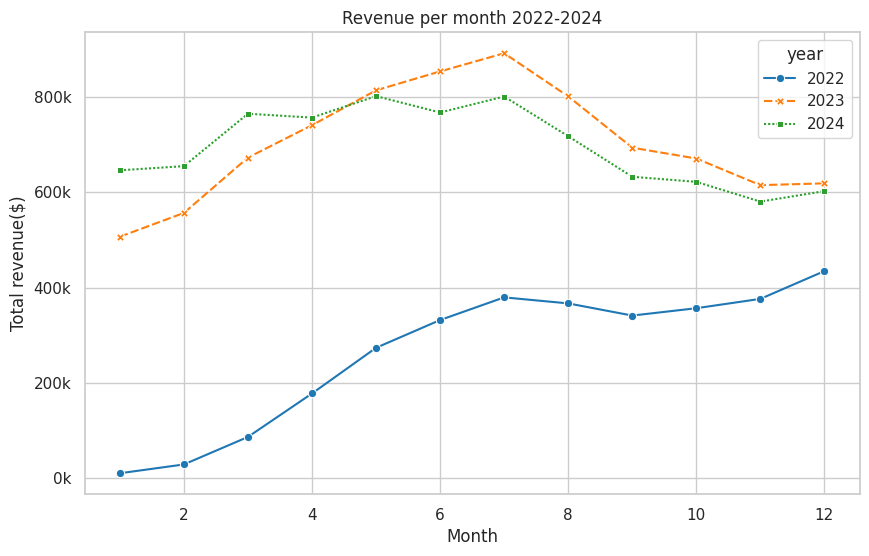

In [ ]:
montsll=data.groupby(['year','month'])['revenue'].sum().reset_index()
sns.set(style= 'whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=montsll, x='month', y='revenue', hue='year',style= 'year', markers= True, errorbar=None, palette='tab10')
plt.title( 'Revenue per month 2022-2024')
plt.xlabel('Month')
plt.ylabel('Total revenue($)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.legend(title='year')
plt.show()

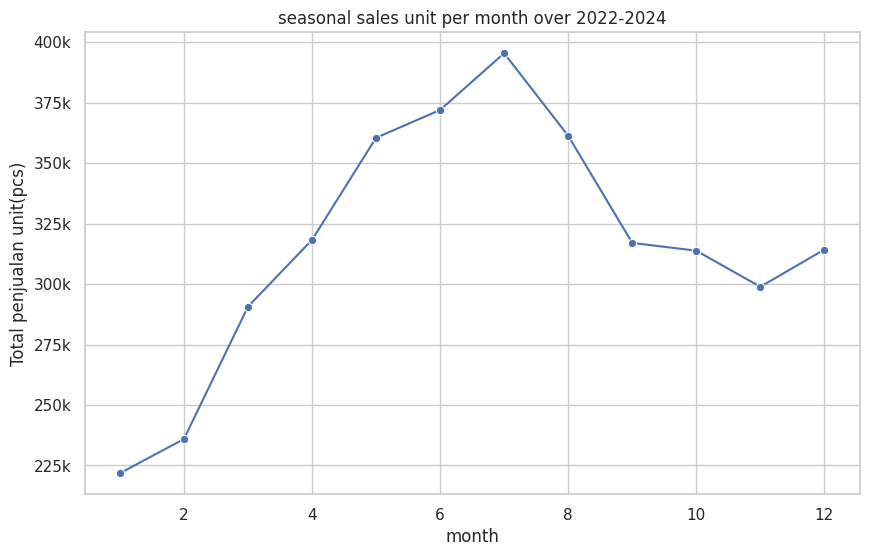

In [ ]:
montsl_product= data.groupby('month')['units_sold'].sum().reset_index()
sns.set(style= 'whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(data= montsl_product, x='month', y='units_sold', marker= 'o')
plt.title( 'seasonal sales unit per month over 2022-2024')
plt.xlabel('month')
plt.ylabel('Total penjualan unit(pcs)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

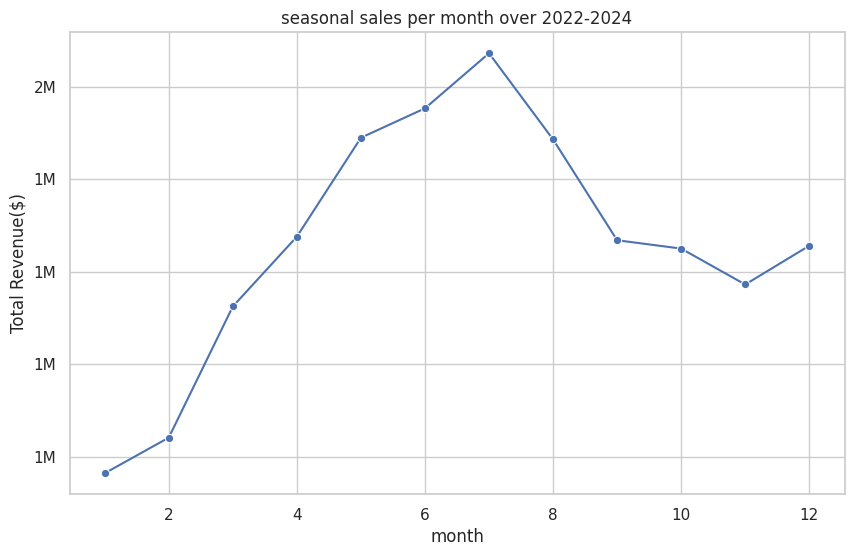

In [ ]:
montsl= data.groupby('month')['revenue'].sum().reset_index()
sns.set(style= 'whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=montsl, x='month', y='revenue', marker= 'o')
plt.title( 'seasonal sales per month over 2022-2024')
plt.xlabel('month')
plt.ylabel('Total Revenue($)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))
plt.show()

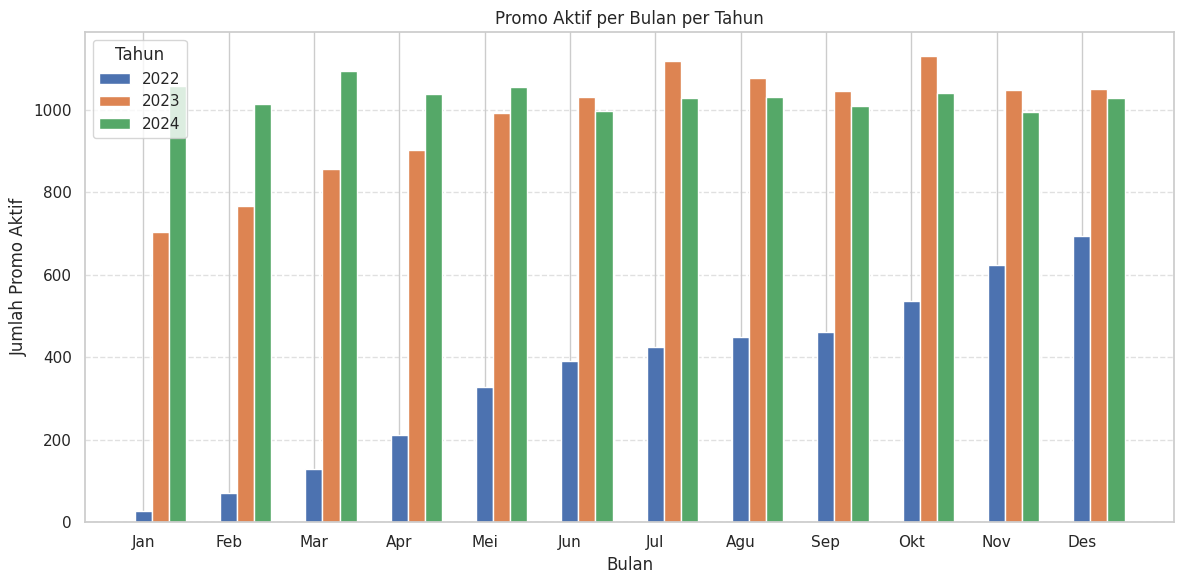

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah hari promo aktif per bulan per tahun
promo_bar = data[data['promotion_flag'] == 1].groupby(['year', 'month']).size().reset_index(name='promo_days')

# Buat bar chart
plt.figure(figsize=(12,6))
for year in sorted(promo_bar['year'].unique()):
    promos = promo_bar[promo_bar['year'] == year]
    plt.bar(promos['month'] + (year - 2022)*0.2, promos['promo_days'], width=0.2, label=f'{year}')

plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'])
plt.xlabel('Bulan')
plt.ylabel('Jumlah Promo Aktif')
plt.title('Promo Aktif per Bulan per Tahun')
plt.legend(title='Tahun')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


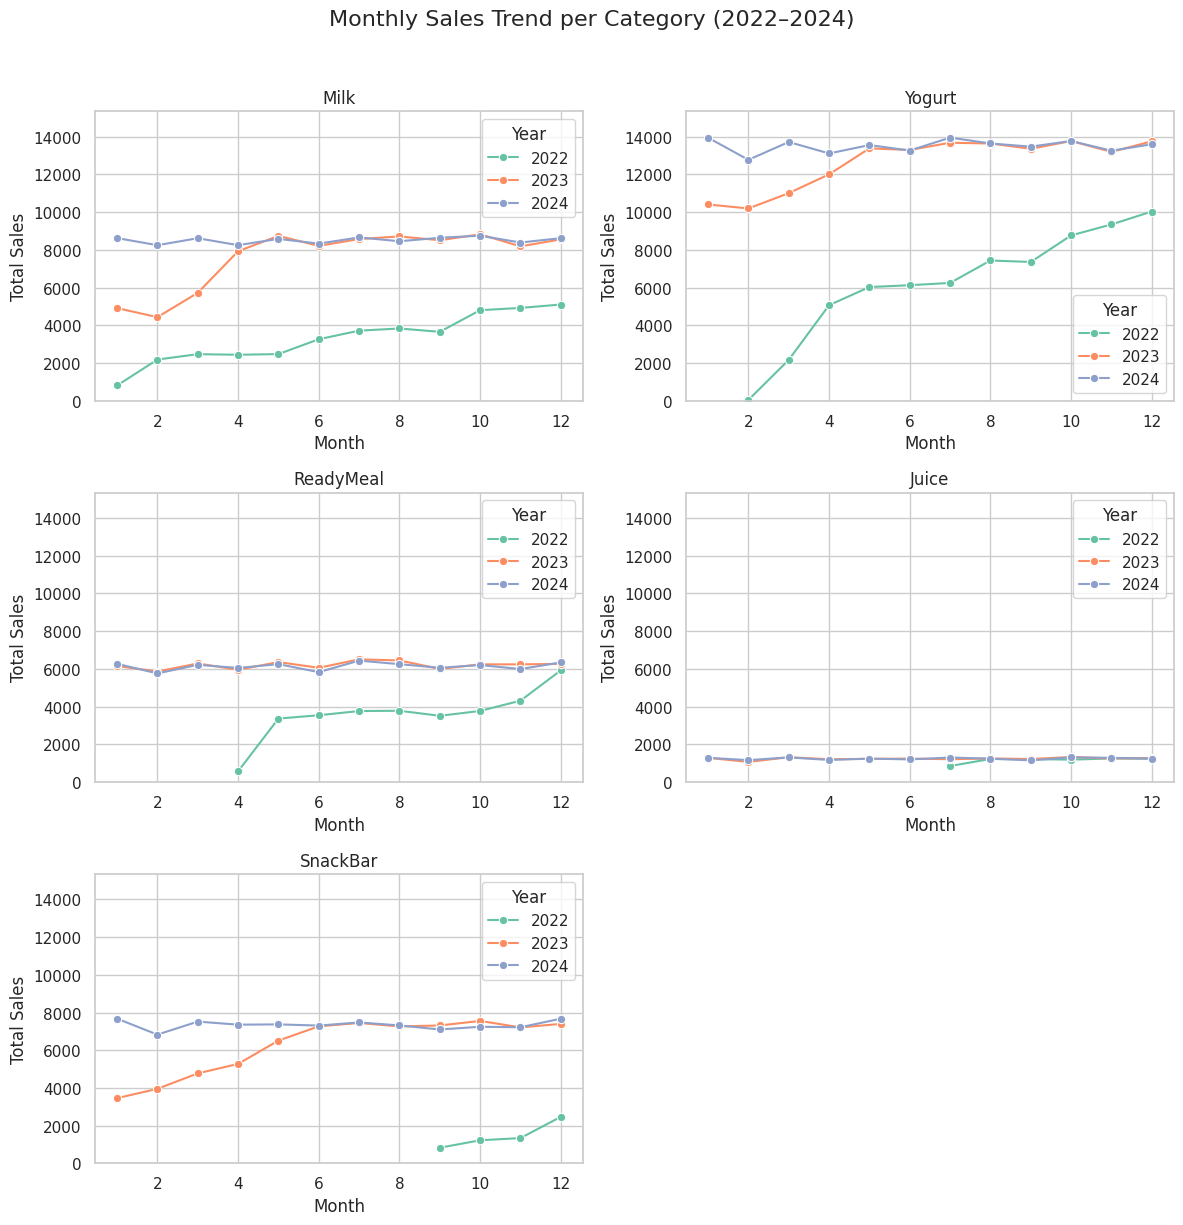

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = monthly_sales['category'].unique()
years = sorted(monthly_sales['year'].unique())

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

max_y= monthly_sales['price_unit'].max()

# Plot per kategori
for i, category in enumerate(categories):
    ax = axes[i]
    subset = monthly_sales[monthly_sales['category'] == category]
    sns.lineplot(data=subset, x='month', y='price_unit', hue='year', marker='o', ax=ax, palette='Set2')
    ax.set_title(category)
    ax.set_ylim(0, max_y*1.1)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales')
    ax.legend(title='Year')

# Kosongkan subplot ke-6 (biar ga muncul kotak kosong)
fig.delaxes(axes[-1])  # hapus plot kosong terakhir (index ke-5)

# Judul utama
fig.suptitle('Monthly Sales Trend per Category (2022–2024)', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()



##promo efectiveness

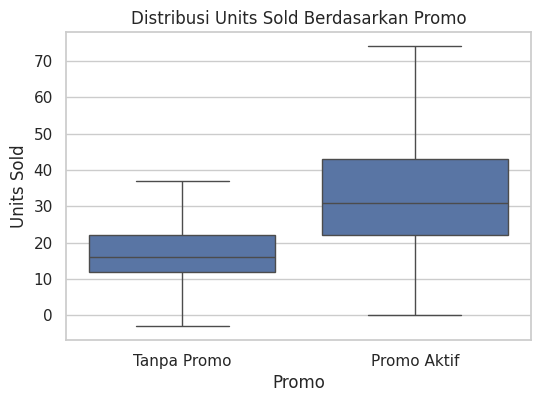

In [ ]:
df=data.copy()
plt.figure(figsize=(6,4))
sns.boxplot(x='promotion_flag', y='units_sold', data=df, showfliers=False)
plt.xticks([0,1], ['Tanpa Promo', 'Promo Aktif'])
plt.title("Distribusi Units Sold Berdasarkan Promo")
plt.xlabel("Promo")
plt.ylabel("Units Sold")
plt.show()


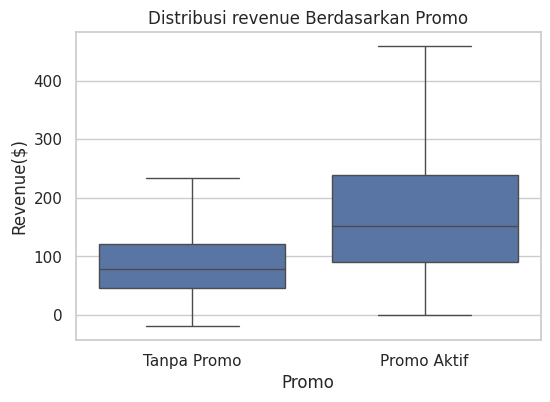

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='promotion_flag', y='revenue', data=df, showfliers=False)
plt.xticks([0,1], ['Tanpa Promo', 'Promo Aktif'])
plt.title("Distribusi revenue Berdasarkan Promo")
plt.xlabel("Promo")
plt.ylabel("Revenue($)")
plt.show()


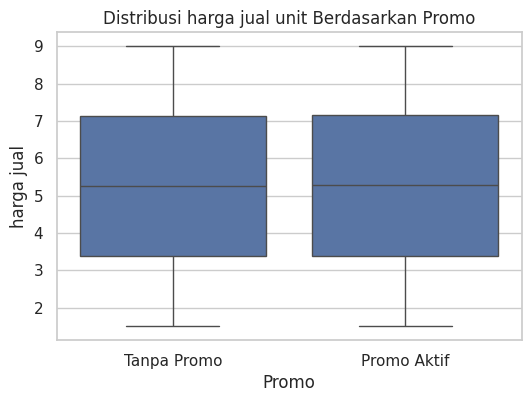

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='promotion_flag', y='price_unit', data=df, showfliers=False)
plt.xticks([0,1], ['Tanpa Promo', 'Promo Aktif'])
plt.title("Distribusi harga jual unit Berdasarkan Promo")
plt.xlabel("Promo")
plt.ylabel("harga jual")
plt.show()

In [ ]:
#secara statistik modelling dtemukan sbagi berikut

In [ ]:
# Drop extreme outliers
df=df[df['units_sold'] < df['units_sold']. quantile(0.99)]
# One-hot encode categorical variables for modeling regression logistic
df_enc= pd.get_dummies(df, columns=['channel', 'region', 'category'], drop_first=True)


#fit regreesoon model
import statsmodels.api as sm

X= df_enc[['promotion_flag', 'price_unit',] + [col for col in df_enc.columns if col.startswith('channel_') or col.startswith('region_') or col.startswith('category_')]]

y = df_enc['units_sold']

X= X.astype(int)
X= sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     5624.
Date:                Tue, 29 Jul 2025   Prob (F-statistic):               0.00
Time:                        06:27:22   Log-Likelihood:            -6.8410e+05
No. Observations:              188750   AIC:                         1.368e+06
Df Residuals:                  188739   BIC:                         1.368e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.5614      0

In [ ]:
##untuk melihat efek promo pada produk menaikan berapa percent
#Interaction regresi
df_int= df_enc.copy()

#buat columns baru
category_cols= [col for col in df_int.columns if col.startswith('category_')]

for col in category_cols:
  new_col= f'promo_{col.split("_")[1]}'
  df_int[new_col]= df_int['promotion_flag'] * df_int[col]



In [ ]:
y =df_int['units_sold']

X=df_int[['promotion_flag', 'price_unit'] +
         [col for col in df_int.columns if col.startswith('category_')] +
         [col for col in df_int.columns if col.startswith('promo_')]]

X= X.astype(int)
X= sm.add_constant(X)

mdl = sm.OLS(y,X).fit()
print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     5633.
Date:                Tue, 29 Jul 2025   Prob (F-statistic):               0.00
Time:                        06:27:22   Log-Likelihood:            -6.8406e+05
No. Observations:              188750   AIC:                         1.368e+06
Df Residuals:                  188739   BIC:                         1.368e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.7872      0

In [ ]:
df['segment'] = df['category']+'_'+df['channel']+'_'+df['region']
segment_up= df.groupby(['segment', 'promotion_flag'])['units_sold'].mean().unstack()
segment_up.columns=['no_promo', 'promo']
segment_up['uplift']=segment_up['promo']-segment_up['promo']
segement_up=segment_up.sort_values('uplift',ascending=True)



In [ ]:
upliftctg= df.groupby(['category','promotion_flag'])['units_sold'].mean().unstack()

upliftctg['uplift'] = upliftctg[1]-upliftctg[0]
upliftctg=upliftctg.sort_values('uplift', ascending= False)
upliftctg

promotion_flag,0,1,uplift
category,,,
ReadyMeal,17.383537,31.920526,14.536988
SnackBar,17.531289,31.776975,14.245687
Yogurt,18.786590,32.264013,13.477423
Milk,15.399921,28.712171,13.312250
Juice,15.722335,28.365112,12.642777


In [ ]:
# Salin dan proses ulang dataframe untuk ditampilkan rapi
upliftctg_clean = upliftctg[[0, 1, 'uplift']].copy()
upliftctg_clean.columns = ['Non-Promo Avg Units Sold', 'Promo Avg Units Sold', 'Uplift (Promo - Non-Promo)']

# Bulatkan agar enak dibaca
upliftctg_clean = upliftctg_clean.round(2)

# Reset index agar bisa tampil sebagai tabel biasa
upliftctg_clean = upliftctg_clean.reset_index()

# Tampilkan
upliftctg_clean


,category,Non-Promo Avg Units Sold,Promo Avg Units Sold,Uplift (Promo - Non-Promo)
0,ReadyMeal,17.38,31.92,14.54
1,SnackBar,17.53,31.78,14.25
2,Yogurt,18.79,32.26,13.48
3,Milk,15.40,28.71,13.31
4,Juice,15.72,28.37,12.64


/tmp/ipython-input-119-4015205135.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='category', y='units_sold', hue='promotion_flag', ci=None)


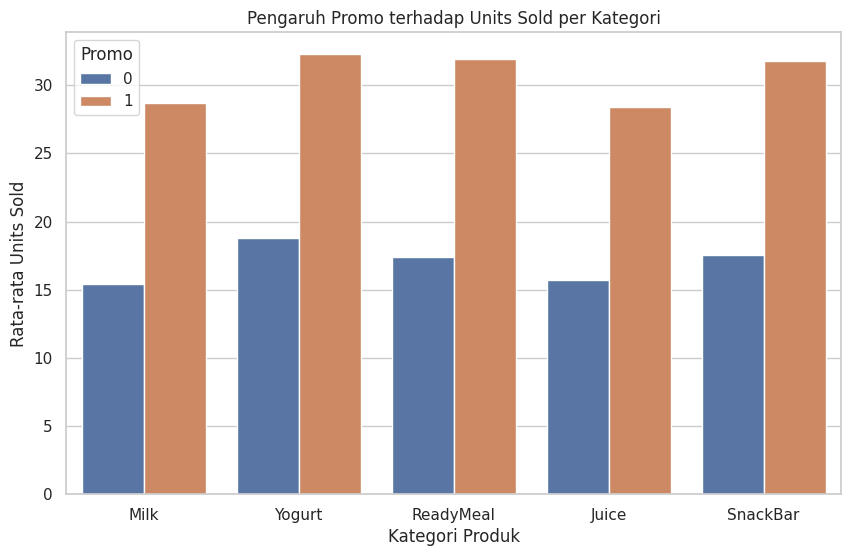

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='category', y='units_sold', hue='promotion_flag', ci=None)
plt.title("Pengaruh Promo terhadap Units Sold per Kategori")
plt.xlabel("Kategori Produk")
plt.ylabel("Rata-rata Units Sold")
plt.legend(title="Promo")
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Data untuk dua grup
promo_on = df[df['promotion_flag'] == 1]['units_sold']
promo_off = df[df['promotion_flag'] == 0]['units_sold']

# A/B test (t-test independent)
t_stat, p_val = ttest_ind(promo_on, promo_off, equal_var=False)

print(f"t-statistik: {t_stat:.3f}")
print(f"p-value: {p_val:.5f}")

if p_val < 0.05:
    print("Hasil: Promo secara signifikan meningkatkan penjualan (reject H0).")
else:
    print(" Hasil: Promo tidak memberikan peningkatan signifikan (fail to reject H0).")


t-statistik: 165.668
p-value: 0.00000
Hasil: Promo secara signifikan meningkatkan penjualan (reject H0).


## prediksi total barang yang dijual
Untuk membantu perencanaan stok & logistik, saya membangun model prediksi units_sold selama 1–4 minggu ke depan berdasarkan time-series historical sales 2022–2024

In [ ]:
dt=data.copy()
dt['date']=pd.to_datetime(dt['date'])
dlysales= dt.groupby('date')['units_sold'].sum().reset_index()
dlysales =dlysales.sort_values('date')
dlysales.set_index('date', inplace= True)

In [ ]:
weeklysales = dlysales['units_sold'].resample('W').sum()


In [ ]:
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(weeklysales)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -1.4828479504281629
p-value: 0.5419785080203453


In [ ]:
weeklysales_diff = weeklysales.diff().dropna()
adf_result_diff = adfuller(weeklysales_diff)
print(f"ADF Statistic (after diff): {adf_result_diff[0]}")
print(f"p-value (after diff): {adf_result_diff[1]}")


ADF Statistic (after diff): -1.1465445428965337
p-value (after diff): 0.6961582972799252


In [ ]:
weeklysales_diff2 = weeklysales.diff().diff().dropna()
from statsmodels.tsa.stattools import adfuller

adf_result_diff2 = adfuller(weeklysales_diff2)
print(f"ADF Statistic (2nd diff): {adf_result_diff2[0]}")
print(f"p-value (2nd diff): {adf_result_diff2[1]}")


ADF Statistic (2nd diff): -7.701530625745119
p-value (2nd diff): 1.3353205348573162e-11


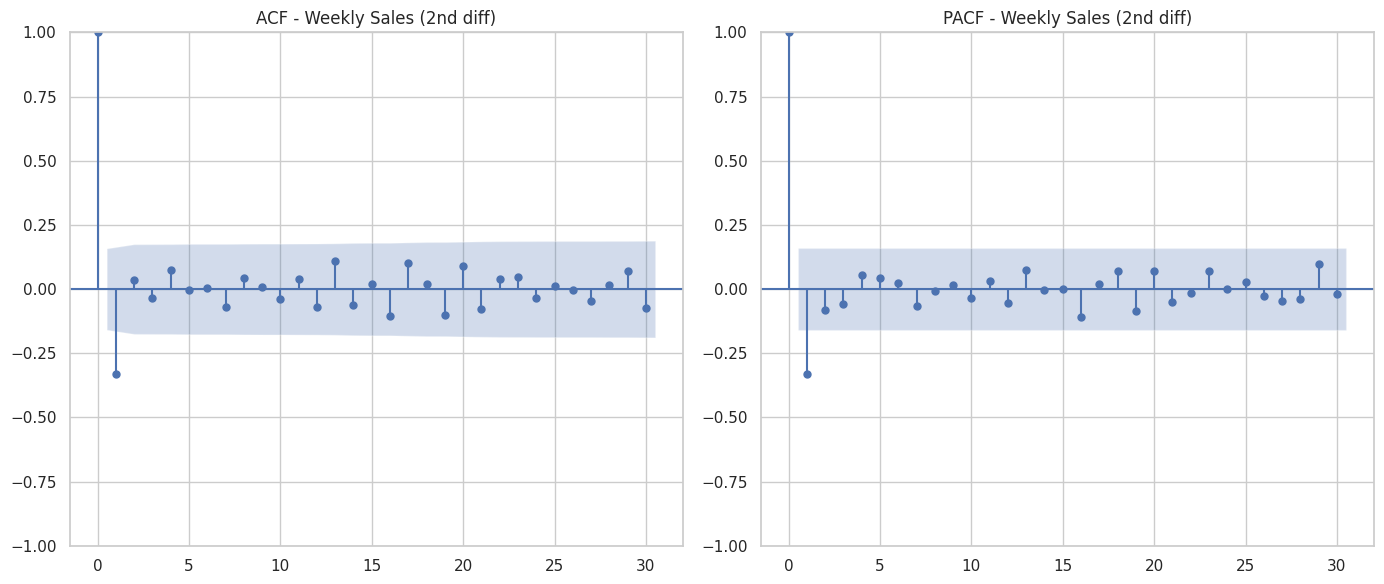

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Second difference data
weekly_diff2 = weeklysales.diff().diff().dropna()

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plot_acf(weekly_diff2, ax=plt.gca(), lags=30)
plt.title('ACF - Weekly Sales (2nd diff)')

plt.subplot(1, 2, 2)
plot_pacf(weekly_diff2, ax=plt.gca(), lags=30, method='ywm')
plt.title('PACF - Weekly Sales (2nd diff)')

plt.tight_layout()
plt.show()


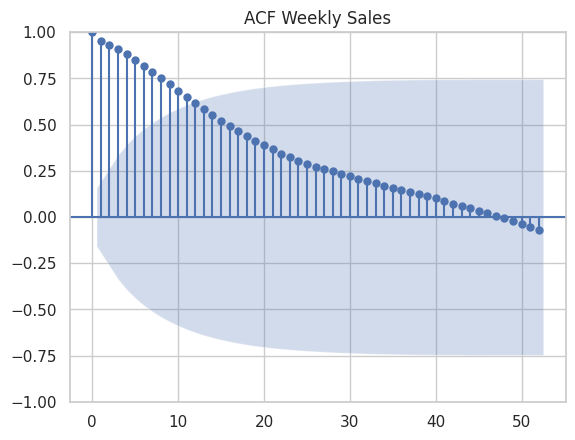

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(weeklysales, lags=52)  # karena setahun ada ~52 minggu
plt.title('ACF Weekly Sales')
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(weeklysales, order=(1,2,1))
fitted_model = model.fit()
# 2. Forecast 4 minggu ke depan
forecast = fitted_model.get_forecast(steps=4)
forecast_index = pd.date_range(start=weeklysales.index[-1] + pd.Timedelta(weeks=1), periods=4, freq='W')
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()
forecast_mean


,predicted_mean
2025-01-12,9125.417142
2025-01-19,5895.024359
2025-01-26,3943.119161
2025-02-02,1667.211567


/tmp/ipython-input-134-975814686.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [weeklysales[-1], forecast_mean[0]],


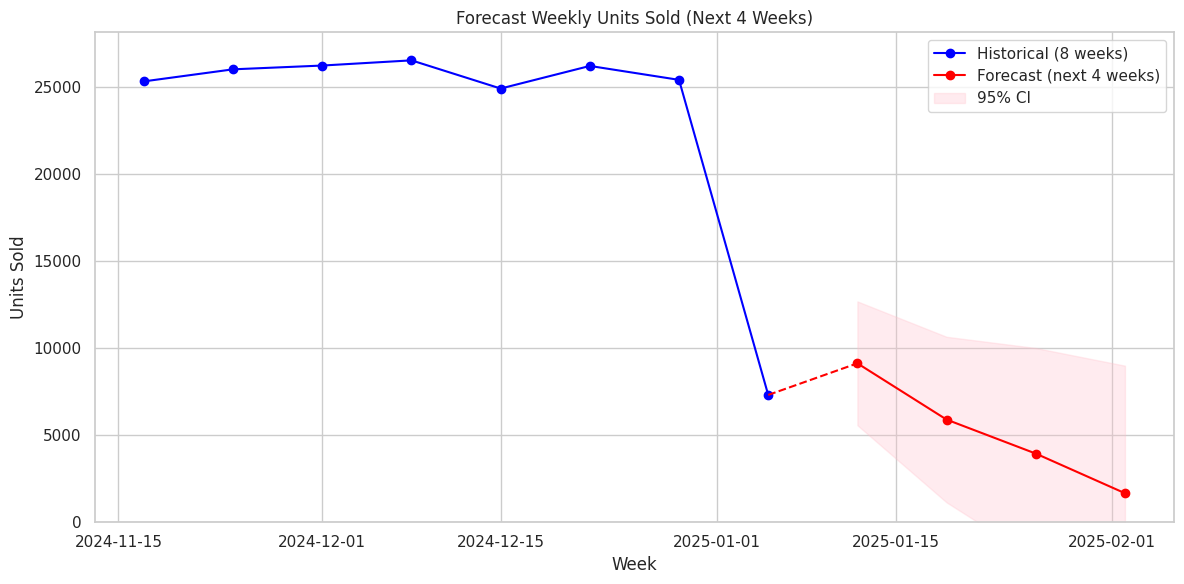

In [ ]:
plt.figure(figsize=(12, 6))

# Plot historical data terakhir (misal 8 minggu)
plt.plot(weeklysales[-8:], label='Historical (8 weeks)', marker='o', color='blue')

# Sambungkan garis dari titik aktual terakhir ke titik forecast pertama (tanpa mengubah warna titik)
plt.plot([weeklysales.index[-1], forecast_index[0]],
         [weeklysales[-1], forecast_mean[0]],
         color='red', linestyle='--')

# Plot forecast
plt.plot(forecast_index, forecast_mean, label='Forecast (next 4 weeks)', color='red', marker='o')

# Confidence interval
plt.fill_between(forecast_index,
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% CI')

plt.ylim(bottom=0)
plt.title('Forecast Weekly Units Sold (Next 4 Weeks)')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
